In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
%cd /content/drive/MyDrive/email_campaigns

/content/drive/MyDrive/email_campaigns


In [4]:
!pwd

/content/drive/MyDrive/email_campaigns


# import dataset and data analysis

In [5]:
data = pd.read_pickle("email_campaigns.pkl")
type(data)

list

In [6]:
data[4]["example1"]

[{'subject': '🚀 Propel Your Marketing with Data-Driven Insights',
  'body': "Hello [Recipient's Name],\n\nAre you harnessing the power of your data to supercharge your marketing campaigns? At [Your Company], we turn analytics into actionable marketing strategies. Unlock your potential with our state-of-the-art analytics dashboard.\n\nEager to learn more? Let's set up a time to talk [meeting link].\n\nBest regards,\n[Your Name]",
  'opened': True,
  'meeting link clicked': False,
  'responded': False},
 {'subject': "[Recipient's Name], are you stepping up your marketing game?",
  'body': "Hi [Recipient's Name],\n\nI noticed you may not have had time to consider my previous mail. It's clear businesses that utilize insights from their marketing data stand out from the competition. How does [Recipient's Company] stack up?\n\nWhen you're ready to dive deeper, check out what we have to offer [meeting link]. Talk soon?\n\nMany thanks,\n[Your Name]",
  'opened': True,
  'meeting link clicked':

Here, the given dataset is in the form of list, so first we need to convert it into the dataframe to make data analysis effetive.

In [7]:
df = pd.DataFrame.from_dict(data, orient='columns')
df.tail()

,example1,marketingAnalytics0,HRConsultingSeries,marketingAnalyticsSeries,MarketingAnalyticsSeries,series_legal,IT_Solutions_Series,Marketing_Analytics_Series,series_marketing_analytics,series1,HR_Consulting_Series,financial_advisory_series,series_IT_Solutions,Series1_HR_Consulting,Series_IT_Solutions,email_series_marketing_analytics,legal_services0
47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[{'subject': 'Empower Your Marketing with Prec...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,[{'subject': '🔍 Elevate Your Marketing Insight...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[{'subject': 'Unlock Insights for Growth 💡 – Y...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,[{'subject': '🚀 Elevate Your Human Capital Man...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,"[{'subject': 'Boost Your Brand Visibility 🚀', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   example1                          28 non-null     object
 1   marketingAnalytics0               1 non-null      object
 2   HRConsultingSeries                2 non-null      object
 3   marketingAnalyticsSeries          2 non-null      object
 4   MarketingAnalyticsSeries          1 non-null      object
 5   series_legal                      1 non-null      object
 6   IT_Solutions_Series               1 non-null      object
 7   Marketing_Analytics_Series        1 non-null      object
 8   series_marketing_analytics        2 non-null      object
 9   series1                           4 non-null      object
 10  HR_Consulting_Series              2 non-null      object
 11  financial_advisory_series         2 non-null      object
 12  series_IT_Solutions     

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

example1                            24
marketingAnalytics0                 51
HRConsultingSeries                  50
marketingAnalyticsSeries            50
MarketingAnalyticsSeries            51
series_legal                        51
IT_Solutions_Series                 51
Marketing_Analytics_Series          51
series_marketing_analytics          50
series1                             48
HR_Consulting_Series                50
financial_advisory_series           50
series_IT_Solutions                 50
Series1_HR_Consulting               51
Series_IT_Solutions                 51
email_series_marketing_analytics    51
legal_services0                     51
dtype: int64


from the above output, it can be seen that there are lots of missing values in the columns other than _example1_, so it will not contribue much in machine learning, so it can be dropped after overall data analysis

In [10]:
# Dropping columns with too many missing values
# dropping the columns which has more than 50% of null values
threshold = 0.5
df = df.dropna(thresh=threshold*len(df), axis=1)
df.head()

,example1
0,[{'subject': '🚀 Propel Your Marketing ROI with...
1,[{'subject': '🚀 Boost Your Brand's Visibility ...
2,[{'subject': '🚀Boost Your ROI with Precision M...
3,[{'subject': '💡 Elevate Your Marketing with Ac...
4,[{'subject': '🚀 Propel Your Marketing with Dat...


In [11]:
# Checking for duplicate rows
duplicates = df.duplicated()
print("Duplicate rows previously:")
print(duplicates)

# Removing duplicate rows
df = df.drop_duplicates()

# check now if duplicate row is remaining
duplicates = df.duplicated()
print("Duplicate rows now:")
print(duplicates)

Duplicate rows previously:
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10    False
11    False
12    False
13    False
14     True
15    False
16     True
17    False
18    False
19     True
20     True
21     True
22     True
23     True
24     True
25    False
26     True
27    False
28    False
29     True
30    False
31     True
32    False
33     True
34     True
35    False
36    False
37     True
38     True
39    False
40     True
41     True
42    False
43    False
44     True
45     True
46    False
47     True
48    False
49     True
50     True
51    False
dtype: bool
Duplicate rows now:
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
10    False
11    False
12    False
13    False
15    False
17    False
18    False
25    False
27    False
28    False
30    False
32    False
35    False
36    False
39    False
42    False
43    False
46   

In [12]:
# after removing the duplicates and cleaning the dataframe, check the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 51
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   example1  28 non-null     object
dtypes: object(1)
memory usage: 464.0+ bytes


In [13]:
df.head()

,example1
0,[{'subject': '🚀 Propel Your Marketing ROI with...
1,[{'subject': '🚀 Boost Your Brand's Visibility ...
2,[{'subject': '🚀Boost Your ROI with Precision M...
3,[{'subject': '💡 Elevate Your Marketing with Ac...
4,[{'subject': '🚀 Propel Your Marketing with Dat...


In [14]:
# Convert DataFrame with dictionary entries to standard DataFrame format
df_normalized = pd.json_normalize(df['example1'])
df_normalized.head()

,0,1,2,3
0,{'subject': '🚀 Propel Your Marketing ROI with ...,{'subject': 'Data is Your Superpower 📊 Unlock ...,{'subject': 'Turn Marketing Data Into Decision...,{'subject': 'Marketing Success is a Click Away...
1,{'subject': '🚀 Boost Your Brand's Visibility w...,{'subject': 'Turn Data into Decisions 📊 - Your...,{'subject': 'Last Call: Your Blueprint for Mar...,"{'subject': 'We’re Confident in our Data, Here..."
2,{'subject': '🚀Boost Your ROI with Precision Ma...,{'subject': 'Your Marketing Strategy Deserves ...,{'subject': 'Can We Help Optimize Your Marketi...,None
3,{'subject': '💡 Elevate Your Marketing with Act...,{'subject': 'Make Data-Driven Decisions with C...,{'subject': 'Missed Opportunity? Let's Talk St...,None
4,{'subject': '🚀 Propel Your Marketing with Data...,"{'subject': '[Recipient's Name], are you stepp...",{'subject': 'Don't Miss Out on Transforming Yo...,None


In [15]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       28 non-null     object
 1   1       28 non-null     object
 2   2       21 non-null     object
 3   3       4 non-null      object
dtypes: object(4)
memory usage: 1.0+ KB


In [16]:
df_normalized = df_normalized.drop(0, axis=1)

In [17]:
df_dict = df_normalized.to_dict()
type(df_dict)

dict

In [18]:
df_dict

{1: {0: {'subject': 'Data is Your Superpower 📊 Unlock Insights with Us',
   'body': "Hi [Recipient's Name],\n\nI'm reaching out again because I believe our last message might've slipped through the cracks. With your goals in mind, our marketing analytics can translate your data into actionable strategies that can redefine your marketing's success.\n\nCan we help you harness this superpower? Book a time on my calendar: [meeting link]. Looking forward to connecting!\n\nCheers,\n[Your Name]",
   'opened': True,
   'meeting link clicked': False,
   'responded': False},
  1: {'subject': 'Turn Data into Decisions 📊 - Your Next Competitive Edge',
   'body': "Hey [Recipient's Name],\n\nI saw that my previous email hasn’t been opened. I get it, you're swamped. Still, I couldn't help but reach out again because I truly believe that our marketing analytics insights can make a substantial difference for [Recipient's Company Name].\n\nHere’s the deal in a nutshell:\n- Customized data reports 📈\n- C

In [19]:
df = pd.DataFrame(df_dict)

# Normalize each column
normalized_columns = [pd.json_normalize(df[col]) if df[col].notnull().any() else pd.DataFrame() for col in df.columns]

# Concatenate the normalized DataFrames
df_normalized_new = pd.concat(normalized_columns, axis=1)
df_normalized_new.head()

,subject,body,opened,meeting link clicked,responded,meeting_link_clicked,subject,body,opened,meeting link clicked,responded,meeting_link_clicked,subject,body,opened,meeting link clicked,responded
0,Data is Your Superpower 📊 Unlock Insights with Us,"Hi [Recipient's Name],\n\nI'm reaching out aga...",True,False,False,NaN,Turn Marketing Data Into Decisions 🧐 Let's Exp...,"Greetings [Recipient's Name],\n\nWe haven't co...",False,False,False,NaN,Marketing Success is a Click Away - Let's Chat...,"Hello [Recipient's Name],\n\nIt's clear that y...",True,True,False
1,Turn Data into Decisions 📊 - Your Next Competi...,"Hey [Recipient's Name],\n\nI saw that my previ...",True,False,False,NaN,Last Call: Your Blueprint for Marketing Succes...,"Hello [Recipient's Name],\n\nI hope this messa...",False,False,False,NaN,"We’re Confident in our Data, Here’s Why You Sh...","Greetings [Recipient's Name],\n\nYour success ...",True,True,False
2,Your Marketing Strategy Deserves the Best Anal...,"Hello [Recipient's Name],\n\nImprove your mark...",True,False,False,NaN,Can We Help Optimize Your Marketing Efforts?,"Good day, [Recipient's Name],\n\nAre you harne...",True,False,True,NaN,NaN,NaN,NaN,NaN,NaN
3,Make Data-Driven Decisions with Confidence,"Good morning [Recipient's Name],\n\nFollowing ...",False,False,False,NaN,Missed Opportunity? Let's Talk Strategy 📊,"Hey [Recipient's Name],\n\nAre you sure you wa...",True,False,True,NaN,NaN,NaN,NaN,NaN,NaN
4,"[Recipient's Name], are you stepping up your m...","Hi [Recipient's Name],\n\nI noticed you may no...",True,False,False,NaN,Don't Miss Out on Transforming Your Marketing ...,"Hey [Recipient's Name],\n\nQuick question: If ...",True,True,False,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_normalized_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject               28 non-null     object
 1   body                  28 non-null     object
 2   opened                28 non-null     object
 3   meeting link clicked  26 non-null     object
 4   responded             28 non-null     object
 5   meeting_link_clicked  2 non-null      object
 6   subject               21 non-null     object
 7   body                  21 non-null     object
 8   opened                21 non-null     object
 9   meeting link clicked  19 non-null     object
 10  responded             21 non-null     object
 11  meeting_link_clicked  2 non-null      object
 12  subject               4 non-null      object
 13  body                  4 non-null      object
 14  opened                4 non-null      object
 15  meeting link clicked  4 non-null      obje

In [21]:
# create new dataframe from column 0 to 5 as they are repeated but has same name

new_df1 = df_normalized_new.iloc[:,0:6].copy()
new_df1.head()
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject               28 non-null     object
 1   body                  28 non-null     object
 2   opened                28 non-null     object
 3   meeting link clicked  26 non-null     object
 4   responded             28 non-null     object
 5   meeting_link_clicked  2 non-null      object
dtypes: object(6)
memory usage: 1.5+ KB


In [22]:
# create new dataframe from column 6 to 11 as they are repeated but has same name

new_df2 = df_normalized_new.iloc[:,6:12].copy()
new_df2.head()
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject               21 non-null     object
 1   body                  21 non-null     object
 2   opened                21 non-null     object
 3   meeting link clicked  19 non-null     object
 4   responded             21 non-null     object
 5   meeting_link_clicked  2 non-null      object
dtypes: object(6)
memory usage: 1.5+ KB


In [23]:
# create new dataframe from column 12 to 16 as they are repeated but has same name

new_df3 = df_normalized_new.iloc[:,12:].copy()
new_df3.head()
new_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject               4 non-null      object
 1   body                  4 non-null      object
 2   opened                4 non-null      object
 3   meeting link clicked  4 non-null      object
 4   responded             4 non-null      object
dtypes: object(5)
memory usage: 1.3+ KB


In [24]:
# concating all the frames

df_new = pd.concat([new_df1,new_df2,new_df3])
df_new.head()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 28
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject               53 non-null     object
 1   body                  53 non-null     object
 2   opened                53 non-null     object
 3   meeting link clicked  49 non-null     object
 4   responded             53 non-null     object
 5   meeting_link_clicked  4 non-null      object
dtypes: object(6)
memory usage: 4.8+ KB


In [25]:
# drop duplicates if any
df_new = df_new.drop_duplicates()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 28
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject               53 non-null     object
 1   body                  53 non-null     object
 2   opened                53 non-null     object
 3   meeting link clicked  49 non-null     object
 4   responded             53 non-null     object
 5   meeting_link_clicked  4 non-null      object
dtypes: object(6)
memory usage: 3.0+ KB


In [26]:
# as meeting_link_clicked column only has 4 non null values, it can be dropped
df_new = df_new.drop('meeting_link_clicked', axis=1)
df_new.head()


,subject,body,opened,meeting link clicked,responded
0,Data is Your Superpower 📊 Unlock Insights with Us,"Hi [Recipient's Name],\n\nI'm reaching out aga...",True,False,False
1,Turn Data into Decisions 📊 - Your Next Competi...,"Hey [Recipient's Name],\n\nI saw that my previ...",True,False,False
2,Your Marketing Strategy Deserves the Best Anal...,"Hello [Recipient's Name],\n\nImprove your mark...",True,False,False
3,Make Data-Driven Decisions with Confidence,"Good morning [Recipient's Name],\n\nFollowing ...",False,False,False
4,"[Recipient's Name], are you stepping up your m...","Hi [Recipient's Name],\n\nI noticed you may no...",True,False,False


In [27]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 28
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject               53 non-null     object
 1   body                  53 non-null     object
 2   opened                53 non-null     object
 3   meeting link clicked  49 non-null     object
 4   responded             53 non-null     object
dtypes: object(5)
memory usage: 2.5+ KB


In [28]:
df_new = df_new.dropna()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 28
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject               49 non-null     object
 1   body                  49 non-null     object
 2   opened                49 non-null     object
 3   meeting link clicked  49 non-null     object
 4   responded             49 non-null     object
dtypes: object(5)
memory usage: 2.3+ KB


In [29]:
# #  now, to train the ML model, the data should be in numerical form

# le = LabelEncoder()
# df_new["opened"] = le.fit_transform(df_new["opened"])
# df_new["meeting link clicked"] = le.fit_transform(df_new["meeting link clicked"])
# df_new["responded"] = le.fit_transform(df_new["responded"])

In [30]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 28
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject               49 non-null     object
 1   body                  49 non-null     object
 2   opened                49 non-null     object
 3   meeting link clicked  49 non-null     object
 4   responded             49 non-null     object
dtypes: object(5)
memory usage: 2.3+ KB


## data visualization

In [31]:
import seaborn
import matplotlib.pyplot as plt


<Axes: >

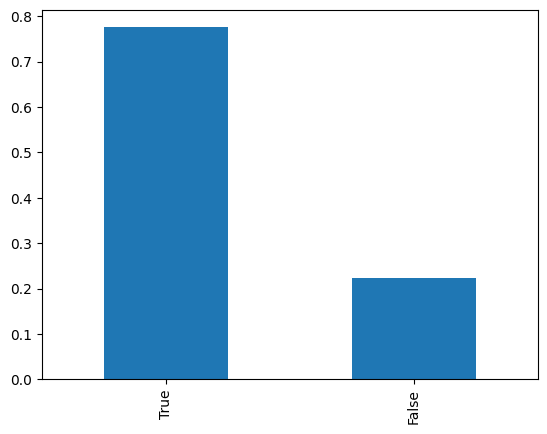

In [32]:
# check open link rate

df_new['opened'].value_counts(normalize = True).plot.bar()

from the above bar chart, it can be seen that the opened rate is more than not opened rate

<Axes: xlabel='responded', ylabel='opened'>

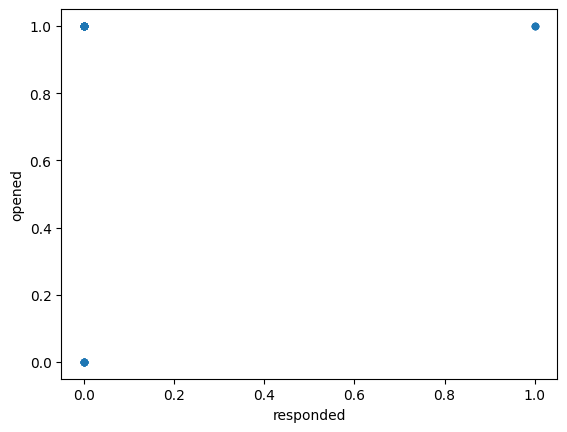

In [33]:
df_new.plot(x="responded", y="opened", kind="scatter")

## text preprocessing

In [34]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


In [35]:
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
ps = PorterStemmer()

In [37]:
# the function to clean the data and remove the punctuations, perform stemming

def clean_data(df, col):

    # change to lower and remove spaces on either side
    df[col] = df[col].apply(lambda x: x.lower().strip())

    # remove extra spaces in between
    df[col] = df[col].apply(lambda x: re.sub(' +', ' ', x))

    # remove punctuation
    df[col] = df[col].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

    # remove stopwords and get the stem
    df[col] = df[col].apply(lambda x: ' '.join(ps.stem(text) for text in x.split() if text not in stop_words))

    return df

In [38]:
df_clean_sub = clean_data(df_new, 'subject')
df_clean_sub = clean_data(df_clean_sub, 'body')

In [39]:
df_clean_sub.head()

,subject,body,opened,meeting link clicked,responded
0,data superpow unlock insight us,hi recipi name reach believ last messag might ...,True,False,False
1,turn data decis next competit edg,hey recipi name saw previou email open get swa...,True,False,False
2,market strategi deserv best analyt,hello recipi name improv market effect data dr...,True,False,False
3,make data driven decis confid,good morn recipi name follow previou convers w...,False,False,False
4,recipi name step market game,hi recipi name notic may time consid previou m...,True,False,False


In [40]:
# function to split text into word

subject = df_new["subject"].str.cat(sep=' ')
tokens = word_tokenize(subject)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)

# the below line gives the words used in sorted manner from the column subject
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)

94


['market',
 'data',
 'analyt',
 'let',
 'driven',
 'success',
 'unlock',
 'insight',
 'decis',
 'strategi',
 'potenti',
 'make',
 'miss',
 'help',
 'compani',
 'turn',
 'next',
 'competit',
 'name',
 'quick',
 'growth',
 'chat',
 'still',
 'interest',
 'explor',
 'enhanc',
 'edg',
 'deserv',
 'confid',
 'recipi',
 'step',
 'roadmap',
 'opportun',
 'unleash',
 'tailor',
 'await',
 'togeth',
 'roi',
 'last',
 'chanc',
 'could',
 'need',
 'optim',
 'transform',
 'work',
 'superpow',
 'us',
 'best',
 'game',
 'follow',
 'power',
 'custom',
 'uncov',
 'propel',
 'drive',
 'strateg',
 'take',
 'level',
 'build',
 'stronger',
 'workforc',
 'dive',
 'deep',
 'maxim',
 'boost',
 'campaign',
 'better',
 'cut',
 'complex',
 'coffe',
 'question',
 'regard',
 'outpac',
 'competitor',
 'call',
 'blueprint',
 'effort',
 'talk',
 'action',
 'guesswork',
 'excel',
 'today',
 'final',
 'hr',
 'outperform',
 'metric',
 'discuss',
 'solut',
 'align',
 'harder',
 'proven',
 'support',
 'click',
 'away']

In [41]:
#function to split text into word

body = df_new["body"].str.cat(sep=' ')
tokens = word_tokenize(body)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)

# the below line gives the words used in sorted manner from the column body
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)

456


['name',
 'link',
 'recipi',
 'meet',
 'market',
 'analyt',
 'data',
 'let',
 'time',
 'best',
 'notic',
 'insight',
 'could',
 'busi',
 'strategi',
 'compani',
 'hello',
 'hi',
 'help',
 'email',
 'previou',
 'custom',
 'messag',
 'success',
 'miss',
 'regard',
 'check',
 'talk',
 'roi',
 'reach',
 'campaign',
 'increas',
 'discuss',
 'schedul',
 'like',
 'hey',
 'want',
 'potenti',
 'last',
 'look',
 'forward',
 'connect',
 'call',
 'servic',
 'transform',
 'book',
 'cheer',
 'optim',
 'see',
 'dive',
 'opportun',
 'quick',
 'chat',
 'analysi',
 'warm',
 'believ',
 'might',
 'action',
 'open',
 'report',
 'convers',
 'effect',
 'understand',
 'explor',
 'competit',
 'offer',
 'thank',
 'interest',
 'chanc',
 'brief',
 'game',
 'changer',
 'love',
 'take',
 'show',
 'click',
 'make',
 'tool',
 'analyz',
 'effici',
 'clear',
 'readi',
 'tailor',
 'effort',
 'client',
 'turn',
 'platform',
 'sure',
 'slip',
 'calendar',
 'specif',
 'enhanc',
 'propel',
 'hope',
 'minut',
 'step',
 'way'

In [42]:
# from wordcloud import WordCloud

# import matplotlib.pyplot as plt
# wordcloud = WordCloud()
# generate_from_frequencies(frequency_dist)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()

## model training

the model will be trained to study the _opened_ with other variables

In [43]:
# now, it is time to divide the dataset into train and test
from sklearn.model_selection import train_test_split

y = df_new["opened"]
X = df_new.drop("opened", axis=1)

print(X.head())
print(y)

                              subject  \
0     data superpow unlock insight us   
1   turn data decis next competit edg   
2  market strategi deserv best analyt   
3       make data driven decis confid   
4        recipi name step market game   

                                                body meeting link clicked  \
0  hi recipi name reach believ last messag might ...                False   
1  hey recipi name saw previou email open get swa...                False   
2  hello recipi name improv market effect data dr...                False   
3  good morn recipi name follow previou convers w...                False   
4  hi recipi name notic may time consid previou m...                False   

  responded  
0     False  
1     False  
2     False  
3     False  
4     False  
0      True
1      True
2      True
3     False
4      True
5      True
7     False
9     False
10    False
11     True
12     True
13     True
14     True
15     True
16     True
17        1
18    False
19

In [44]:
X.shape

(49, 4)

In [45]:
y.shape

(49,)

In [46]:
# keeping 33% of dataset as a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32, 4), (17, 4), (32,), (17,))

In [48]:
# TFIDF is used to transform text corpus to feature vectors

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(4, 6) (4, 6)


In [49]:
print("Number of samples in train_vectors:", train_vectors.shape[0])
print("Number of samples in y_train:", len(y_train))


Number of samples in train_vectors: 4
Number of samples in y_train: 32


as the data we have to train on is textual data, the naive bayes algorithm works effectively on the data

In [50]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(train_vectors, y_train)

ValueError: ignored

after passing the data from TF-IDF, the data size of training vectors in decreased. Whereas the size of y_train is not affected.

To check why error is getting, the below steps are followed.

In [ ]:
print("Missing values in X_train:", X_train.isnull().sum())
print("Missing values in y_train:", y_train.isnull().sum())
print("Missing values in X_test:", X_test.isnull().sum())
print("Number of missing values in y_train:", y_train.isnull().sum())

In [ ]:

print("Shape of train_vectors:", train_vectors.shape)
print("Shape of test_vectors:", test_vectors.shape)


In [ ]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_test = X_test.reset_index(drop=True)


In [ ]:
# Make sure X_test has the same features as X_train
assert set(X_test.columns) == set(X_train.columns), "Features in X_test and X_train do not match"


## Model prediction

In [ ]:
# once the model is trained, it is time to check the accuracy
from  sklearn.metrics  import accuracy_score

predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))